## Comparacion de SVM y una NN de resultados de clasificacion a partir de datos aumentados por oversampling de la categoria minoritaria. 

In [115]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df=pd.read_csv('../prepared_data.csv')
df.set_index('Id', inplace=True)
df

,Coarseness/ngtdm/original,Energy/firstorder/original,GrayLevelNonUniformity/glrlm/original,GrayLevelNonUniformity/glszm/original,Idn/glcm/original,LargeDependenceHighGrayLevelEmphasis/gldm/original,Maximum/Image-original/diagnostics,RunLengthNonUniformity/glrlm/original,SmallDependenceLowGrayLevelEmphasis/gldm/original,TotalEnergy/firstorder/original,VolumeNum/Mask-original/diagnostics,VoxelNum/Mask-original/diagnostics,ZoneEntropy/glszm/original,y.BoundingBox/Mask-original/diagnostics,y.CenterOfMassIndex/Mask-original/diagnostics,highGrade
Id,,,,,,,,,,,,,,,,
0.783201,0.007719,1.115748e+07,158.590584,17.388889,0.935386,652.826984,237.0,175.099687,0.006669,1.115748e+07,1.0,1260,4.696937,138.0,161.988889,True
0.729412,0.004074,3.206621e+07,293.777441,50.100719,0.934436,611.548231,253.0,546.590764,0.009179,3.206621e+07,1.0,2685,5.422075,112.0,149.808566,True
0.662097,0.002515,5.772904e+07,435.126064,85.296015,0.934934,660.159679,270.0,961.241702,0.008074,5.505470e+07,1.0,3244,5.453404,104.0,152.673859,True
0.782308,0.006769,5.558937e+07,158.487887,27.150943,0.951514,1143.141304,314.0,273.906764,0.006239,4.038406e+07,1.0,1840,5.047446,150.0,171.559783,True
0.585369,0.006528,5.079416e+08,149.244465,44.787419,0.949190,3356.104019,981.0,696.367524,0.001814,1.705622e+09,1.0,1692,5.763565,181.0,202.115248,True
0.786196,0.007631,1.959830e+07,137.973606,20.038462,0.943711,1047.397810,260.0,188.529098,0.006150,1.959829e+07,1.0,1370,4.613586,116.0,139.901460,True
0.737139,0.001973,1.849698e+08,582.299942,93.553398,0.951032,1602.351715,416.0,1214.801794,0.003282,1.849698e+08,1.0,6474,5.764459,61.0,112.927556,True
0.779184,0.003287,3.118863e+07,323.221641,45.735043,0.940631,823.317415,212.0,400.263144,0.009114,2.974380e+07,1.0,2785,4.893539,85.0,122.743268,True
0.588451,0.005590,4.273150e+09,183.264741,70.555031,0.970345,7778.426678,1267.0,3153.091686,0.001706,1.434885e+10,1.0,7924,7.339029,144.0,202.033190,True


In [116]:
'''df_true = df[df['highGrade'] == True]
df_false = df[df['highGrade'] == False]

test_size = int(0.2 * len(df))
half_test_size = test_size // 2

test_true = df_true.sample(n=half_test_size, random_state=42)
test_false = df_false.sample(n=half_test_size, random_state=42)

df_test = pd.concat([test_true, test_false]) 

df = df.drop(df_test.index)

print("DATASET TRAINING: ", len(df), " REGISTROS")

print("DATASET TESTING: ", len(df_test), " REGISTROS")'''

'df_true = df[df[\'highGrade\'] == True]\ndf_false = df[df[\'highGrade\'] == False]\n\ntest_size = int(0.2 * len(df))\nhalf_test_size = test_size // 2\n\ntest_true = df_true.sample(n=half_test_size, random_state=42)\ntest_false = df_false.sample(n=half_test_size, random_state=42)\n\ndf_test = pd.concat([test_true, test_false]) \n\ndf = df.drop(df_test.index)\n\nprint("DATASET TRAINING: ", len(df), " REGISTROS")\n\nprint("DATASET TESTING: ", len(df_test), " REGISTROS")'

In [117]:
# df es el de train y df_test de test
df, df_test = train_test_split(
    df,
    test_size=0.2,
    stratify=df['highGrade'],  # mantiene la proporción de clases"?
    random_state=51
)

### Oversampling

Este metodo duplica registros de la clase minoritaria aletaoriamente hasta llegar a balancear el dataset. En este caso buscamos un balance del 50/50.
Esto lo logra calculando la relacion entre high y low grades, para luego aplicar esta relacion a la hora de seleccionar registros para el dataset resultante.        

In [118]:
''' 
indices_0 = df[df['highGrade'] == False].index  
indices_1 = df[df['highGrade'] == True].index   
indices = indices_0.union(indices_1)


weight_minority_class = len(indices_1) / len(indices_0)


weights_0 = pd.Series(weight_minority_class, index=indices_0)
weights_1 = pd.Series(1.0, index=indices_1)
weights = pd.concat([weights_0, weights_1])
weights = weights / weights.sum()  # Normalizar

sampled_indices = np.random.choice(weights.index, size=len(weights), p=weights.values)


df_oversampled = df.loc[sampled_indices]


positive_frac = round(100 * df_oversampled['highGrade'].mean(), 3)
print(f'Fraction of positive labels in oversampled data: {positive_frac}%')
df_oversampled.mean()'''

" \nindices_0 = df[df['highGrade'] == False].index  \nindices_1 = df[df['highGrade'] == True].index   \nindices = indices_0.union(indices_1)\n\n\nweight_minority_class = len(indices_1) / len(indices_0)\n\n\nweights_0 = pd.Series(weight_minority_class, index=indices_0)\nweights_1 = pd.Series(1.0, index=indices_1)\nweights = pd.concat([weights_0, weights_1])\nweights = weights / weights.sum()  # Normalizar\n\nsampled_indices = np.random.choice(weights.index, size=len(weights), p=weights.values)\n\n\ndf_oversampled = df.loc[sampled_indices]\n\n\npositive_frac = round(100 * df_oversampled['highGrade'].mean(), 3)\nprint(f'Fraction of positive labels in oversampled data: {positive_frac}%')\ndf_oversampled.mean()"

In [119]:
from imblearn.over_sampling import SMOTE

# Asumiendo df tiene la columna 'highGrade' como target
X = df.drop(columns=['highGrade'])
y = df['highGrade']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convertimos de nuevo a DataFrame para mantener la consistencia con df_oversampled
df_oversampled = X_resampled.copy()
df_oversampled['highGrade'] = y_resampled

positive_frac = round(100 * df_oversampled['highGrade'].mean(), 3)
print(f'Fraction of positive labels in oversampled data: {positive_frac}%')

Fraction of positive labels in oversampled data: 50.0%


In [120]:
from sklearn.preprocessing import StandardScaler
import pickle

X = df_oversampled.drop(columns=['highGrade'])
X_test= df_test.drop(columns=['highGrade']) # for testing later


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test) #for testing later

# Guardar el scaler entrenado
with open("../despliegue2/botero-mlops-u2-main/backend/resources/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

X_scaled_df= pd.DataFrame(X_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_all = pd.concat([X_scaled_df, X_test_scaled_df], axis=0)

y = df_oversampled['highGrade']
y_test = df_test['highGrade']

y_all = np.concatenate([y.values, y_test.values])
#y_all = np.vstack((y, y_test))

🔍 Mejores hiperparámetros: {'C': 10, 'coef0': 0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

📊 Classification Report:
              precision    recall  f1-score   support

       False       0.50      0.83      0.62         6
        True       0.94      0.75      0.83        20

    accuracy                           0.77        26
   macro avg       0.72      0.79      0.73        26
weighted avg       0.84      0.77      0.79        26



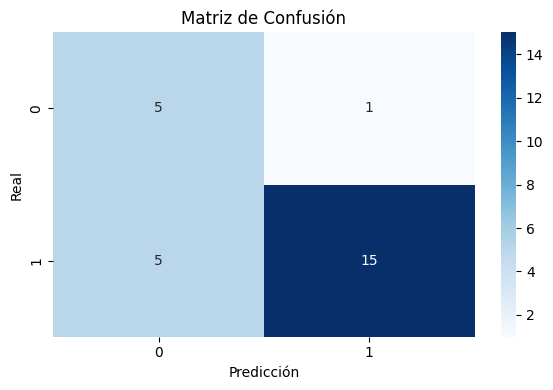

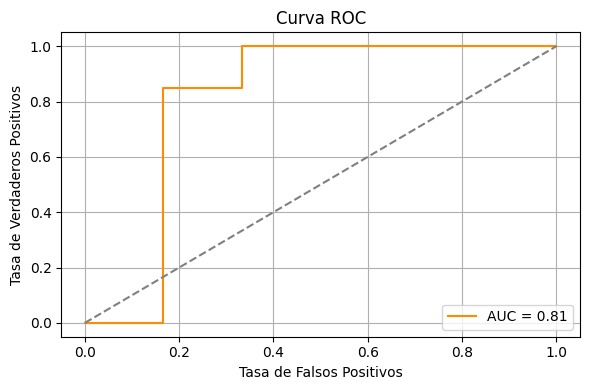


📈 Cross-Validation Accuracy: 0.8101 ± 0.0569


In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_curve, auc, RocCurveDisplay
)
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

y = df_oversampled['highGrade']

y_test = df_test['highGrade']

# =======================
# ENTRENAMIENTO SVM
# =======================
svm = SVC(probability=True)

param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3],
    'coef0': [0, 1]
}

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_scaled_df, y)

best_svm = grid_search.best_estimator_
print("🔍 Mejores hiperparámetros:", grid_search.best_params_)

# =======================
# EVALUACIÓN EN TEST
# =======================
y_pred = best_svm.predict(X_test_scaled_df)
y_proba = best_svm.predict_proba(X_test_scaled_df)[:, 1]  # Probabilidad de clase positiva

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# =======================
# MATRIZ DE CONFUSIÓN
# =======================
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# =======================
# CURVA ROC Y AUC
# =======================
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

# =======================
# VALIDACIÓN CRUZADA
# =======================
scores = cross_val_score(best_svm, X_scaled, y, cv=5, scoring='accuracy')
print(f"\n📈 Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


In [122]:
import pickle
with open('../despliegue2/botero-mlops-u2-main/backend/resources/svm_model.pkl', 'wb') as f:
    pickle.dump(best_svm, f)

In [123]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
best_k = 2
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans_final.fit_predict(X_all)




unique, counts = np.unique(clusters, return_counts=True)
cluster_balance = dict(zip(unique, counts))

print("Cluster balance:", cluster_balance)




df_cluster_comparison = pd.DataFrame({
    'cluster': clusters,
    'true_label': y_all.astype(int)  # Convert booleans to 0 (False) and 1 (True)
})

# Show how each cluster overlaps with true labels
cluster_vs_label = pd.crosstab(df_cluster_comparison['cluster'], df_cluster_comparison['true_label'])
print("Cluster vs. True Label:\n", cluster_vs_label)






Cluster balance: {0: 43, 1: 141}
Cluster vs. True Label:
 true_label   0   1
cluster           
0            8  35
1           77  64
